In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_df = pd.read_csv("./data/data.csv")
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


Miss data

In [4]:
for col in data_df.columns:
    miss_data= data_df[col].isna().sum()
    percent_miss=(miss_data/len(data_df))*100
    print(f'Columns {col}: Có {percent_miss}%')

Columns Country: Có 0.0%
Columns Age: Có 10.0%
Columns Salary: Có 10.0%
Columns Purchased: Có 0.0%


<AxesSubplot:>

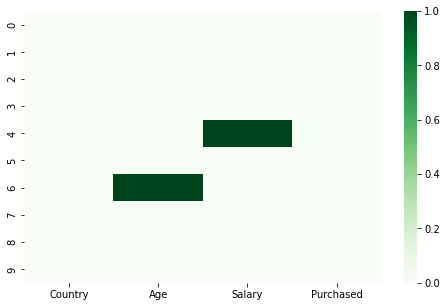

In [5]:
# Vẽ biểu đồ 
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data= data_df.isna(), cmap= 'Greens')

<AxesSubplot:>

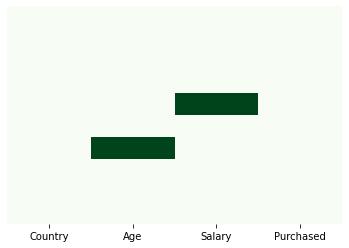

In [6]:
# Bỏ cột chú thích màu "cbar= False"
# Bỏ yticklabels=False 

fig, ax = plt.subplots()#figsize=(8,5)
sns.heatmap(data= data_df.isna(), cmap= 'Greens', cbar= False, yticklabels=False)

In [7]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
x= data_df.iloc[:,:-1].values
x;
y= data_df.iloc[:,-1].values
y;

Tìm và thay thế các giá trị nan bằng thư viện sklearn.impute

In [9]:
from sklearn.impute import SimpleImputer 
#sklearn là thư mục
# impute : tên file
# SimpleImputer : tên hàm

"Thay giá trị nan thành giá trị mean";
impute= SimpleImputer(missing_values= np.nan, strategy= 'mean') #impute: đổ lỗi

# Huấn luyện dữ liệu
impute.fit(x[:, 1:3])
# x

SimpleImputer()

In [10]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [11]:
X_new= x
impute.fit(X_new[:, 1:3])


SimpleImputer()

In [12]:
X_new[:, 1:3]= impute.transform(X_new[:, 1:3])

Encode Categorical data: Mã hiệu hóa danh mục
Categorical: Phân loại
Encode Independent varible: Mã hóa biến độc lập

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
X_new

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

Biến đổi cột đầu tiên string thành số

In [15]:
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# ColumnTransformer: cột cần chuyển đổi
# transformers: trả về 1 list
# ('encoder'): Cung cấp 1 list tham số  'encoder'
# OneHotEncoder: cột cần biến đổi
# [0]: vị trí cột số 0 là cột chuỗi string
# remainder: Phần còn lại, ở đây bỏ qua bằng key 'passthrought': tức là cột 1, 2 Bỏ qua


In [16]:
X_new= ct.fit_transform(X_new)
X_new

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [17]:
"""Giải thích:
'Cột col[0]='France'
Col[1] 'Germany',
Col[2]= 'Spain'
tương ứng [0,1,2] là label vị trí trong list
xem lại https://www.youtube.com/watch?v=VsXKtjddXWY [phút 25:00]
"""

"Giải thích:\n'Cột col[0]='France'\nCol[1] 'Germany',\nCol[2]= 'Spain'\ntương ứng [0,1,2] là label vị trí trong list\nxem lại https://www.youtube.com/watch?v=VsXKtjddXWY [phút 25:00]\n"

In [18]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [19]:
# Encoder y
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()
y= le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Model machice

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test= train_test_split(X_new, y, test_size=0.2)

In [23]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [24]:
Y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

Do dữ liệu không tương đồng giữa tuổi tác và mức lương. Xảy ra dự đoán sai so thực tế
Ta cần tiêu chuẩn hóa dữ liệu: Feater Scaling (dịch sát nghĩa tính năng mở rộng quy mô)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Thực hiện co dãn dữ liệu mô hình tiêu chuẩn 
"""Công thức:
X_stand={x-X_mean(x)/standard diviation(x)}
standard diviation: số lệch tiêu chuẩn
"""
sc = StandardScaler()
X_train[:, 3:]= sc.fit_transform(X_train[:, 3:])
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [27]:
# X_train đã fit nên X_test chỉ cần tranform vào thôi
X_test[:, 3:]=sc.transform(X_test[:, 3:])
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)

In [28]:
n=0
while n<10:
    print("******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!")
    n+= 1

******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
******** Chú ý: Cần học lại, chưa hiểu bài này nhé !!!!!!!!!!!!!
